<a href="https://colab.research.google.com/github/Chulika1711/AI-ML-Internship/blob/main/Clustering_using_DBSCAN(TASK8).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Loading the dataset and importing the libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/segmentation data.csv')

Mounted at /content/drive


In [ ]:
!pip install scikit-learn-extra

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 9.7 MB/s eta 0:00:00


In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

**Exploratory Data Analysis (EDA):** Perform basic exploratory data analysis to understand the structure and characteristics of the dataset. This may include checking for missing values, summary statistics, distributions of variables, etc.



In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB
None


In [ ]:
print(df.head())

          ID  Sex  Marital status  Age  Education  Income  Occupation  \
0  100000001    0               0   67          2  124670           1   
1  100000002    1               1   22          1  150773           1   
2  100000003    0               0   49          1   89210           0   
3  100000004    0               0   45          1  171565           1   
4  100000005    0               0   53          1  149031           1   

   Settlement size  
0                2  
1                2  
2                0  
3                1  
4                1  


In [ ]:
print(df.describe())

                 ID          Sex  Marital status          Age   Education  \
count  2.000000e+03  2000.000000     2000.000000  2000.000000  2000.00000   
mean   1.000010e+08     0.457000        0.496500    35.909000     1.03800   
std    5.774946e+02     0.498272        0.500113    11.719402     0.59978   
min    1.000000e+08     0.000000        0.000000    18.000000     0.00000   
25%    1.000005e+08     0.000000        0.000000    27.000000     1.00000   
50%    1.000010e+08     0.000000        0.000000    33.000000     1.00000   
75%    1.000015e+08     1.000000        1.000000    42.000000     1.00000   
max    1.000020e+08     1.000000        1.000000    76.000000     3.00000   

              Income   Occupation  Settlement size  
count    2000.000000  2000.000000      2000.000000  
mean   120954.419000     0.810500         0.739000  
std     38108.824679     0.638587         0.812533  
min     35832.000000     0.000000         0.000000  
25%     97663.250000     0.000000        

**Feature Selection**

In [ ]:
# Choose two features for visualization
feature1 = 'Age'
feature2 = 'Income'


**Preprocessing the Data :** Preprocessing is crucial to ensure that the data is in a suitable format for the algorithm and to improve its performance.
StandardScaler: It standardizes features by removing the mean and scaling them to unit variance. Standardization makes the features have a mean of 0 and a standard deviation of 1. This process is important when features have different ranges, as it helps algorithms converge faster and prevents features with larger scales from dominating those with smaller scales.

In [ ]:
#scale or normalize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df[[feature1, feature2]])

**Clustering using DBSCAN**

DBSCAN (Density-Based Spatial Clustering of Applications with Noise).It groups ‘densely grouped’ data points into a single cluster. It can identify clusters in large spatial datasets by looking at the local density of the data points. The most exciting feature of DBSCAN clustering is that it is robust to outliers. DBSCAN requires only two parameters: epsilon and minPoints. Epsilon is the radius of the circle to be created around each data point to check the density and minPoints is the minimum number of data points required inside that circle for that data point to be classified as a Core point.



In [ ]:
# DBSCAN parameters: eps(core point) - The maximum distance between two samples for one to be considered as in the neighborhood of the other.
# min_samples - The number of samples in a neighborhood for a point to be considered as a core point.
eps = 0.5
min_samples = 5
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
clusters = dbscan.fit_predict(data_scaled)


 A data point is a Core point if the circle around it contains at least ‘minPoints’ number of points. If the number of points is less than minPoints, then it is classified as Border Point

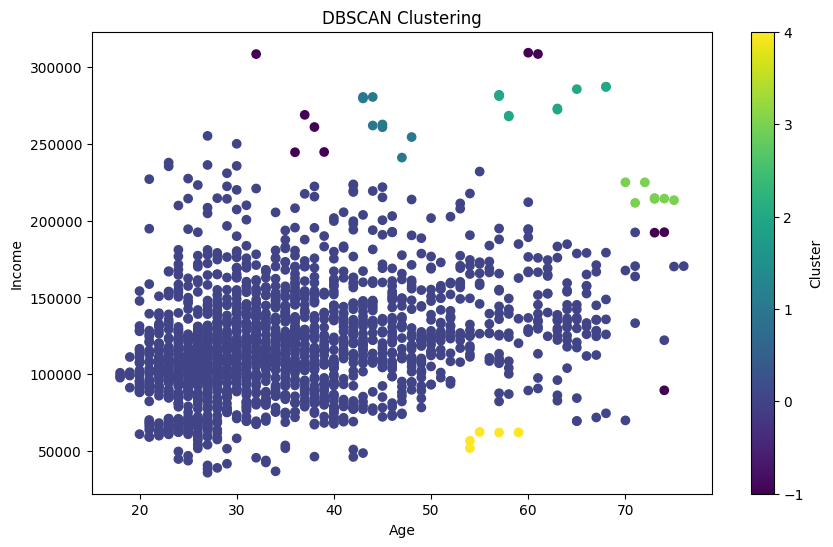

In [ ]:
# Step 6: Visualize Clusters
plt.figure(figsize=(10, 6))
plt.scatter(df[feature1], df[feature2], c=clusters, cmap='viridis')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title('DBSCAN Clustering')
plt.colorbar(label='Cluster')
plt.show()